# Taxi Trip Fare Prediction

**Importing required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We have to data set as train data and test data , so lets check it out and read the files

In [4]:
df1= pd.read_csv('/content/drive/MyDrive/Taxi_Fair_price_Project /train.csv')
df1

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [5]:
df1.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [10]:
df1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [7]:
df1.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [8]:
df1.shape

(209673, 8)

In [11]:
df1.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [120]:
df1.duplicated().sum()

4325

In [121]:
df1.drop_duplicates().shape

(205348, 8)

**Data Visualization**

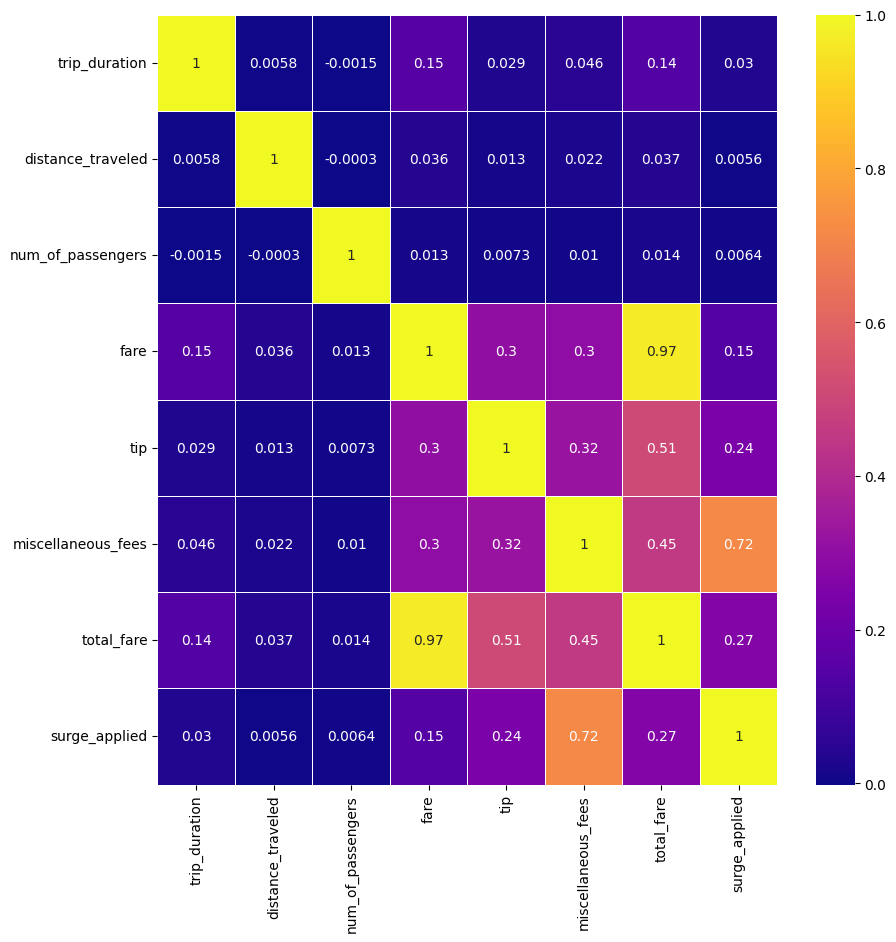

In [122]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), cmap='plasma', linecolor='white',linewidth=0.5, annot=True)
plt.show()

Seeing the corrlation figure we can say that fair lable had a direct implication on target column total_fare with a corelationvalue of 97%

Now we must check the scatter plot to see how leagends are scattered  

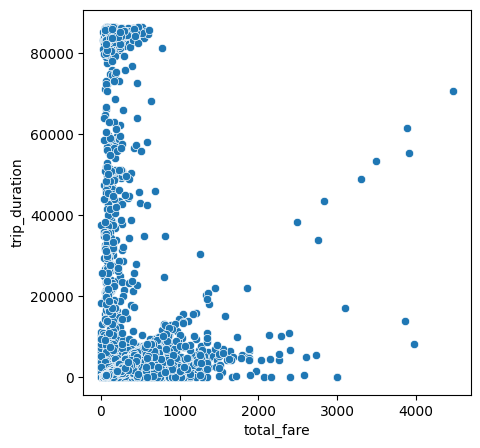

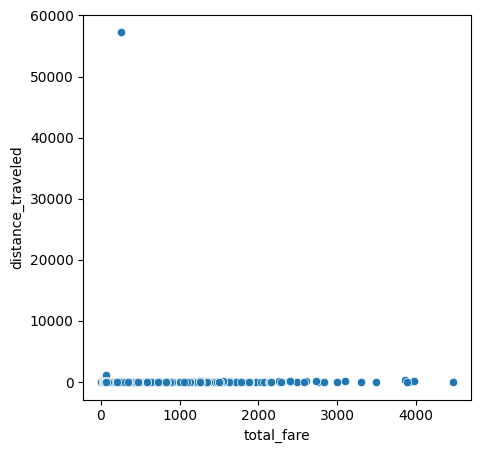

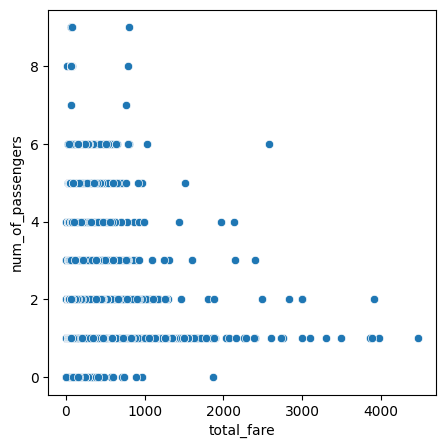

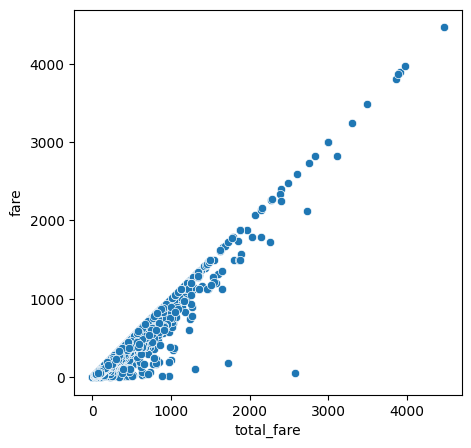

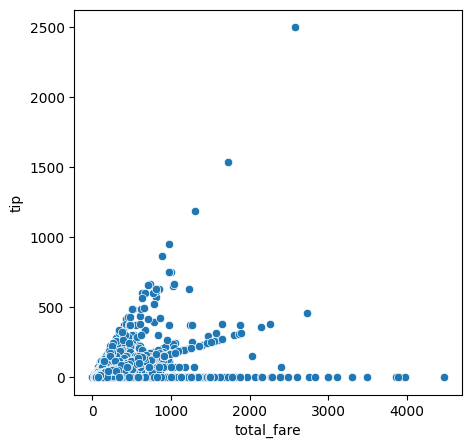

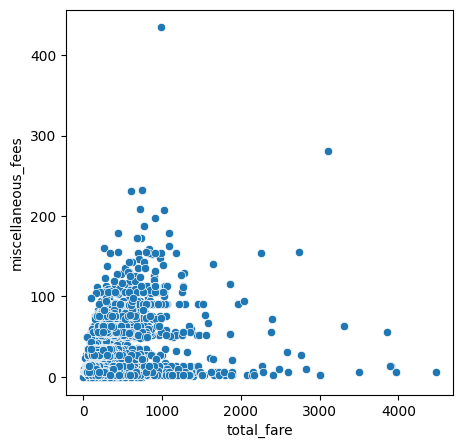

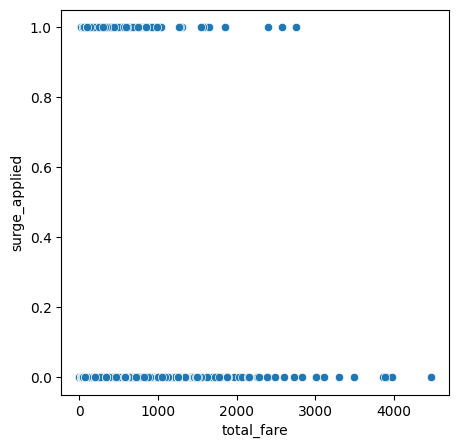

In [123]:
for col in df1.columns:
  if col != "total_fare": # totale fare is our target column
    plt.figure(figsize=(5,5))
    #plt.subplot(2,3,1)
    sns.scatterplot(x=df1['total_fare'], y=df1[col])
    plt.show()

**Train & Test Split**

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X=df1.drop(columns='total_fare')
X

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,0
2,730.0,3.12,1.0,71.25,0,26.625,1
3,671.0,5.63,3.0,90.00,0,9.750,0
4,329.0,2.09,1.0,45.00,12,13.200,0
...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,1
209670,571.0,2.82,1.0,63.75,0,6.000,0
209671,491.0,2.16,1.0,56.25,0,13.500,0


In [126]:
y=df1['total_fare']
y

0         105.300
1         142.200
2          97.875
3          99.750
4          70.200
           ...   
209668    202.800
209669     95.325
209670     69.750
209671     69.750
209672    339.750
Name: total_fare, Length: 209673, dtype: float64

In [128]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)


Now we must fit the values to linear regression model

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [130]:
LR = LinearRegression()

In [131]:
LR.fit(X_train, y_train)
LR

LinearRegression()

In [132]:
y_pred = LR.predict(X_test)


In [133]:
r2s = r2_score(y_pred,y_test)
print(f'{round(r2s*100,2)}% Accurate \n\n')

print('mse :' , mean_squared_error(y_pred, y_test))


print('mae :' , mean_absolute_error(y_pred, y_test))

100.0% Accurate 


mse : 3.46442920712835e-26
mae : 5.817562799794351e-14


Now let us see predition in a scatter plot

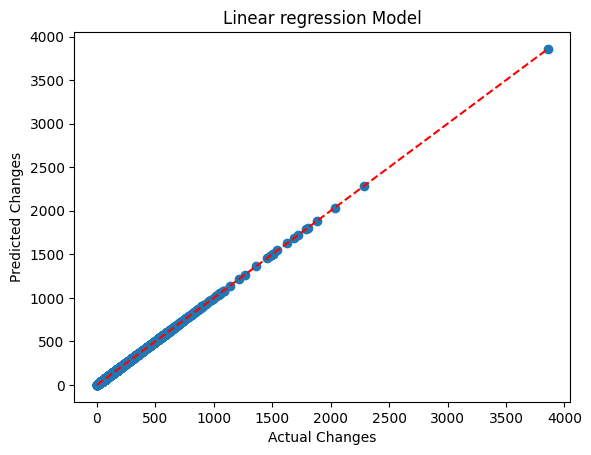

In [134]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Changes')
plt.ylabel('Predicted Changes')
plt.title('Linear regression Model')
plt.show()

Feature Tuining with standard Scaler

In [142]:
from sklearn.preprocessing import StandardScaler
X=df1.drop(columns='total_fare')
#X
y=df1['total_fare']
#y
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)


In [143]:
STD = StandardScaler()

In [144]:
X_train_SD = STD.fit_transform(X_train)
X_test_SD = STD.transform(X_test)

** *Model Tuining with STD* **

In [145]:
LR2 = LinearRegression()

In [146]:
LR2.fit(X_train_SD, y_train)

LinearRegression()

In [147]:
y_pred2= LR2.predict(X_test_SD)

In [148]:
r2s_2 = r2_score(y_pred2,y_test)
print(f'{round(r2s_2*100,2)}% Accurate \n\n')

print('mse :' , mean_squared_error(y_pred2, y_test))
print('mae :' , mean_absolute_error(y_pred2, y_test))

100.0% Accurate 


mse : 5.4966835427267675e-27
mae : 5.4507034128609366e-14


Now let us see predition in a scatter plot

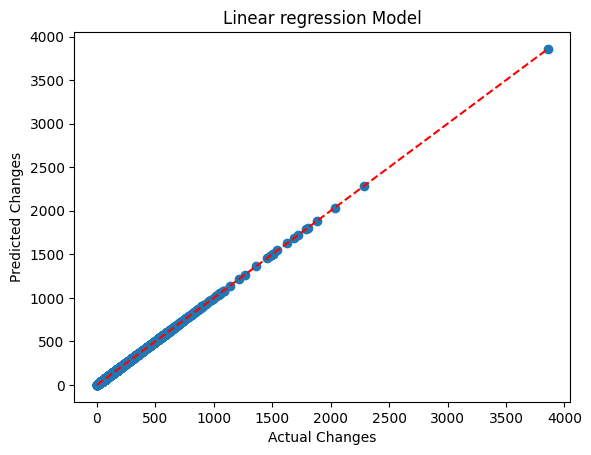

In [149]:
plt.scatter(y_test, y_pred2)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Changes')
plt.ylabel('Predicted Changes')
plt.title('Linear regression Model')
plt.show()